**Question 1**

* Provide at least two methods to view the number of rows and the number of columns in the `mpg` dataset.

In [24]:
# Loaded ggplot 2 to get the mpg data
library(ggplot2)
data(mpg)
head(mpg)

# dim gives the dimensions of the data, where you can see there is 234 rows and 11 columns 
dim(mpg)

# nrow and ncol of mpg dataset tell you the number of rows and 
nrow(mpg)
ncol(mpg) 


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


[1] 234  11

[1] 234

[1] 11

**Question 2**

* Execute the following code:

    ```R
    ggplot(data = mpg) + 
      geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))
    ```

* Identify the issue with the code.
* Correct it so that the plot displays as intended.

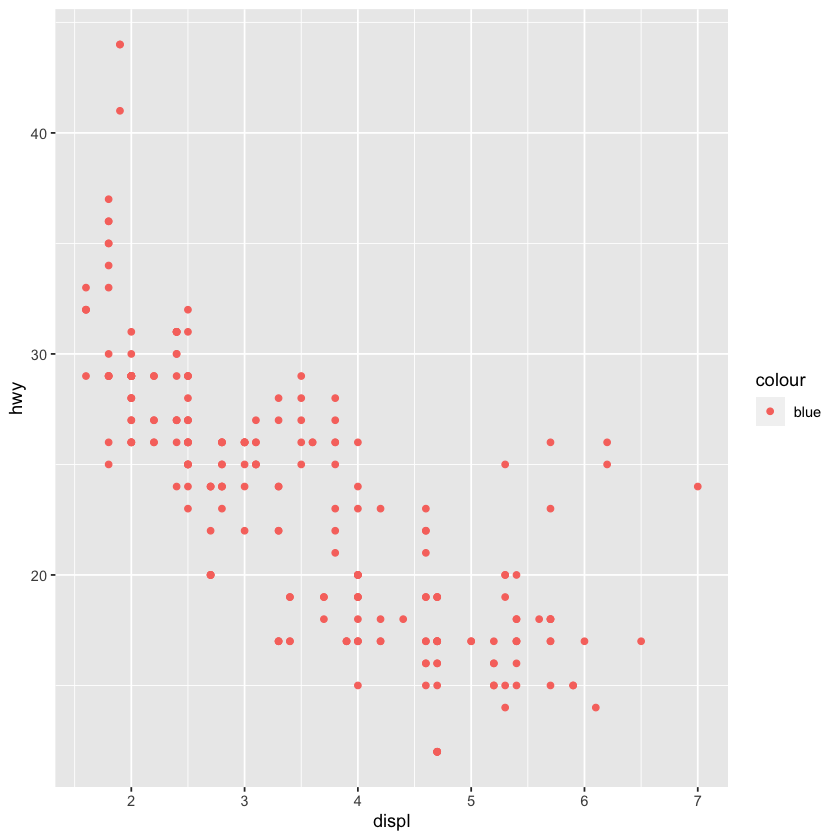

In [17]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

In [18]:
# the issue with the code is when the color is inside aes, it is assigning blue as a label. To fix it, color needs
# to go outside the aes. You can also call a column to be set as a color inside aes. 

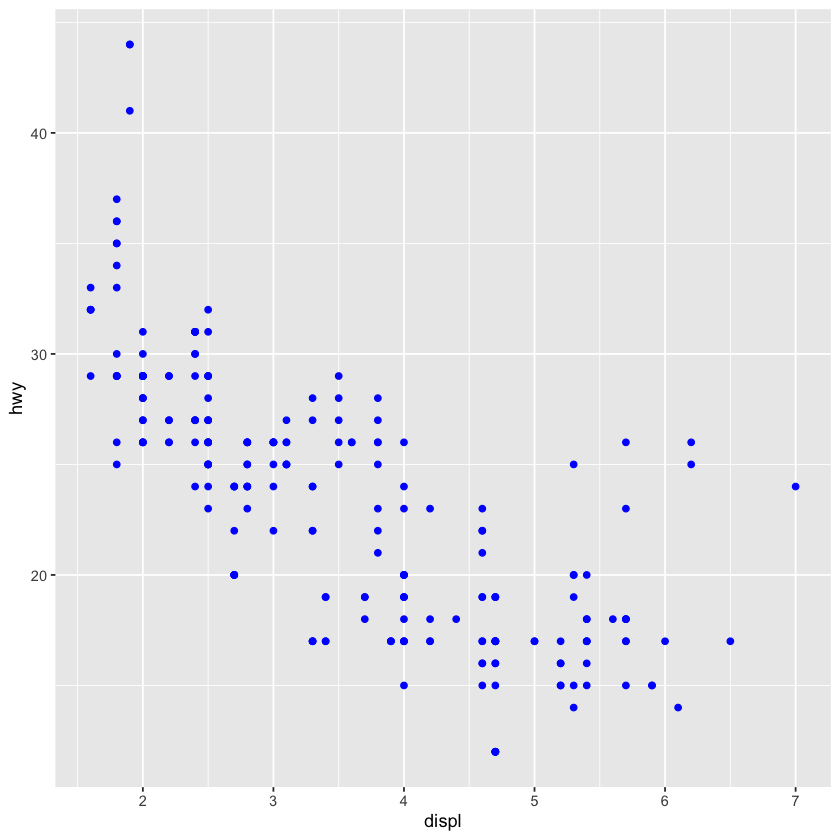

In [3]:
# Fixed ggplot scatter plot
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

**Question 3**

Create a `facet grid` to explore how the relationships between `displ` and `hwy` differ among vehicle classes and drive configurations.

To create the facet grid, use the `facet_grid()` function in ggplot2. 
The tilde (~) symbol inside the function specifies which variable is a function of the other. For example, facet_grid(x ~ y) will generate subplots where x varies by row of the facet and y varies by column of the facet.


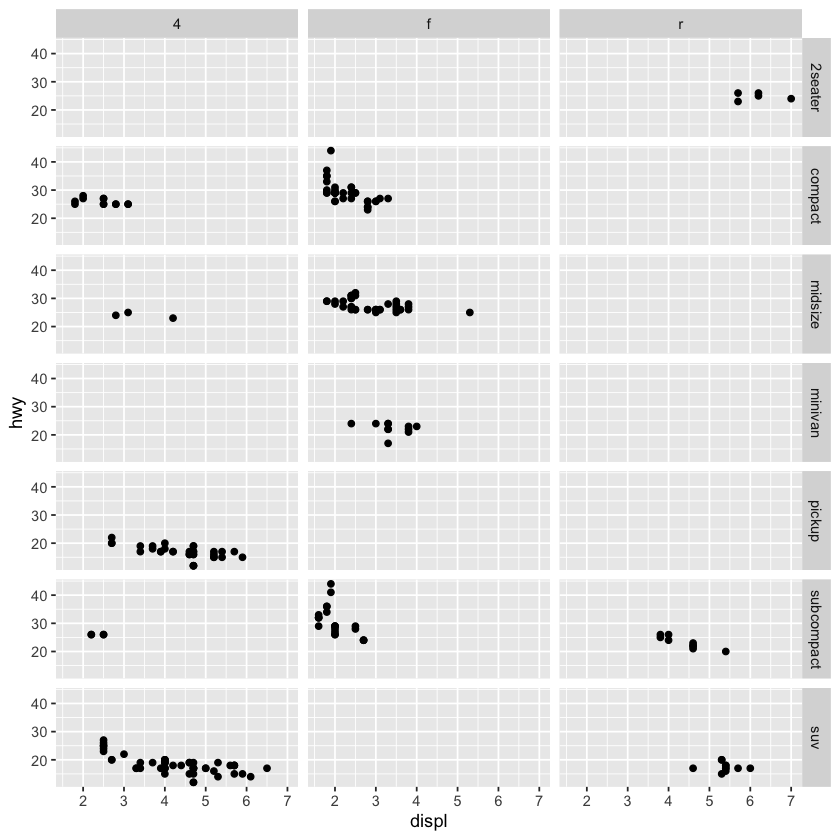

In [27]:
# Use mpg data displaying the relationship between display and highway mpg per grid of vehicle class and drive  
# tilde = explain something as a function of another
# Our example demonstrates display vs. highway into vehicle class
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
    geom_point() +
    facet_grid(~ class ~ drv)

**Question 4**

* Create a scatter plot for the variables `cty` (x-axis) and `hwy` (y-axis) from the `mpg` dataset.
* Add a geom to show the linear regression between x and y.
    * Use a linear model (`lm`) instead of the default (`loess`) for computing the regression.
    * Set the line color to `red`.
    * Color the points by `class`.
    * Set the point size to 6.

`geom_smooth()` using formula = 'y ~ x'


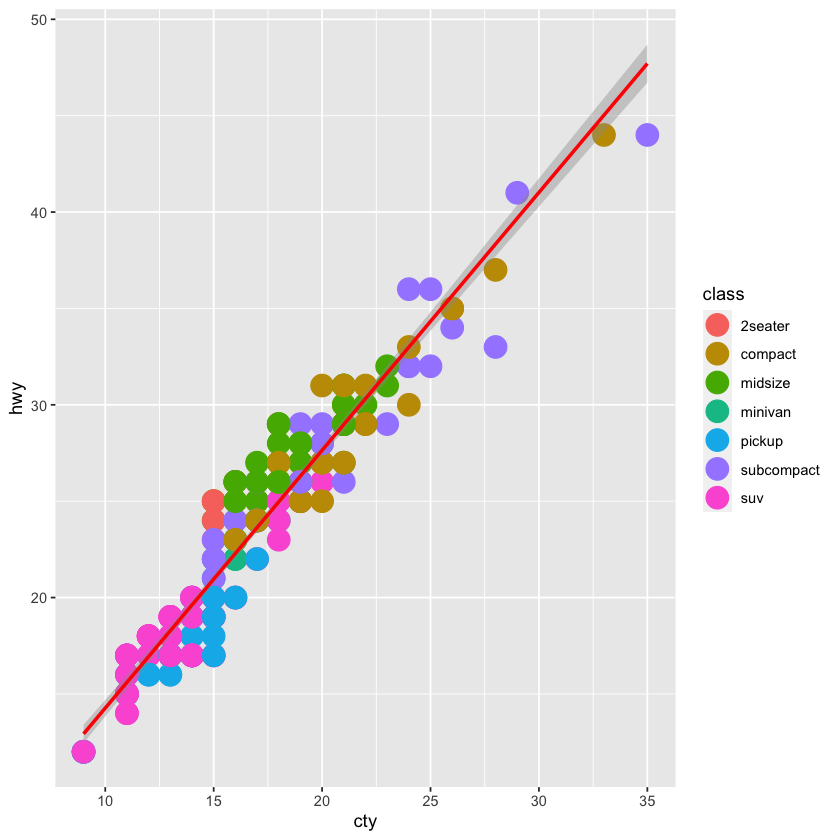

In [37]:
# Imported mpg data, defined the x and y axis and colored the points per vehicle size class. 
# I wasn't able to change the point size font inside aes, but I put it inside geom_point instead
# Then I used geom_smooth the generate a linear model of the trend and set it to red 
ggplot(data = mpg, aes(x = cty, y = hwy, color = class)) +
    geom_point(size = 6) + 
    geom_smooth(method = lm, color = "red")

**Question 5**

* In the previous plot, you noticed subcompacts with a city fuel consumption of 15 miles per gallon.
* Extract only the manufacturer and model of these subcompacts.

In [18]:
mpg_subset <- subset(mpg, cty == 15)
compact_subset <- subset(mpg_subset, class == "subcompact")
compact_subset

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact
ford,mustang,4.6,1999,8,manual(m5),r,15,22,r,subcompact
ford,mustang,4.6,2008,8,manual(m5),r,15,23,r,subcompact
ford,mustang,4.6,2008,8,auto(l5),r,15,22,r,subcompact


**Question 6**

* The following code generates a warning:

    ```R
    ggplot(data = mpg) + 
      geom_point(mapping = aes(x = displ, y = hwy, shape = class))
    ```

* Correct the code so all classes are displayed.
    * Hint: You can manually specify shapes using the `scale_shape_manual` geom.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (`geom_point()`).”


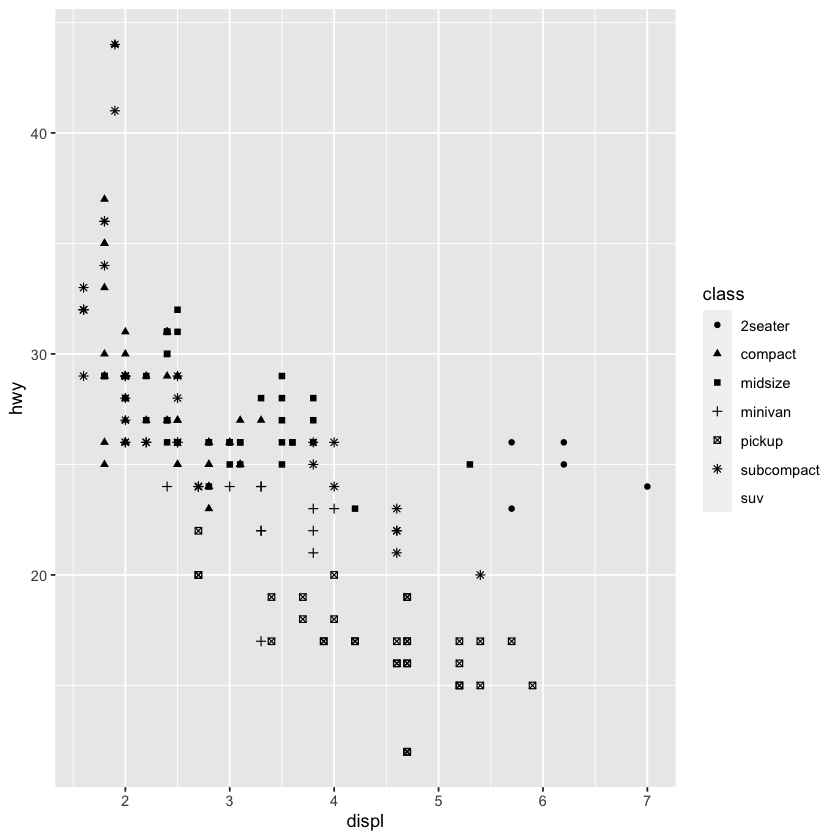

In [60]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

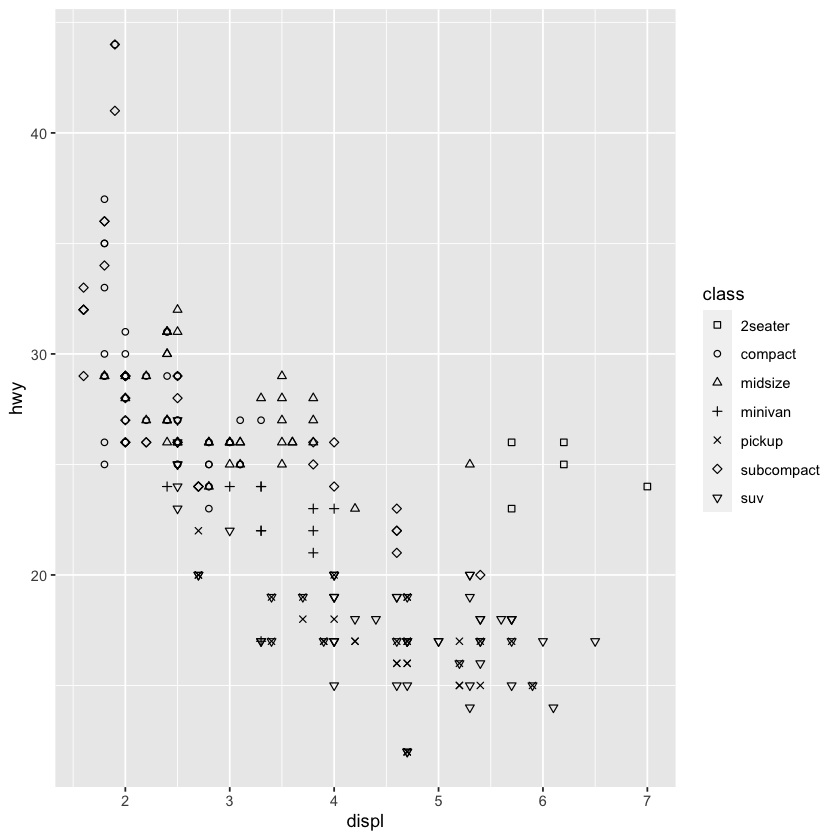

In [34]:
# Added shapes in the sequence 0-7 so all of the classes could be represented
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class)) +
    scale_shape_manual(values=seq(0,7))

**Question 7**

* Given the following two vectors:

```R
x <- c(3.385,0.48,1.35,465,36.33,27.66,14.83,1.04,4.19,0.425,0.101,0.92,1,0.005,0.06,3.5,2,1.7,2547,0.023,187.1,521,0.785,10,3.3,0.2,1.41,529,207,85,0.75,62,6654,3.5,6.8,35,4.05,0.12,0.023,0.01,1.4,250,2.5,55.5,100,52.16,10.55,0.55,60,3.6,4.288,0.28,0.075,0.122,0.048,192,3,160,0.9,1.62,0.104,4.235)
y <- c(44.5,15.5,8.1,423,119.5,115,98.2,5.5,58,6.4,4,5.7,6.6,0.14,1,10.8,12.3,6.3,4603,0.3,419,655,3.5,115,25.6,5,17.5,680,406,325,12.3,1320,5712,3.9,179,56,17,1,0.4,0.25,12.5,490,12.1,175,157,440,179.5,2.4,81,21,39.2,1.9,1.2,3,0.33,180,25,169,2.6,11.4,2.5,50.4)
```
* Combine the two vectors into a data frame called `sizeMass`.
    * Name the columns as `size` and `mass` respectively.

In [30]:
x <- c(3.385,0.48,1.35,465,36.33,27.66,14.83,1.04,4.19,0.425,0.101,0.92,1,0.005,0.06,3.5,2,1.7,2547,0.023,187.1,521,0.785,10,3.3,0.2,1.41,529,207,85,0.75,62,6654,3.5,6.8,35,4.05,0.12,0.023,0.01,1.4,250,2.5,55.5,100,52.16,10.55,0.55,60,3.6,4.288,0.28,0.075,0.122,0.048,192,3,160,0.9,1.62,0.104,4.235)
y <- c(44.5,15.5,8.1,423,119.5,115,98.2,5.5,58,6.4,4,5.7,6.6,0.14,1,10.8,12.3,6.3,4603,0.3,419,655,3.5,115,25.6,5,17.5,680,406,325,12.3,1320,5712,3.9,179,56,17,1,0.4,0.25,12.5,490,12.1,175,157,440,179.5,2.4,81,21,39.2,1.9,1.2,3,0.33,180,25,169,2.6,11.4,2.5,50.4)

sizeMass <- data.frame(x, y)
colnames(sizeMass) <- c("Size", "Mass")
head(sizeMass)

,Size,Mass
,<dbl>,<dbl>
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5
6,27.660,115.0


* Use the code below to plot the data.

    ```R
    ggplot(sizeMass, aes(size, mass)) +
      geom_point() +
      geom_smooth(method = "lm", color = "red", se = FALSE)
    ```

**Question 8**

* Transform the data in the plot to mitigate the "squashed" appearance.

1. Add two new columns named `size_log10` and `mass_log10` containing the log10 values of `size` and `mass`, respectively. Then use these new columns for plotting.

`geom_smooth()` using formula = 'y ~ x'


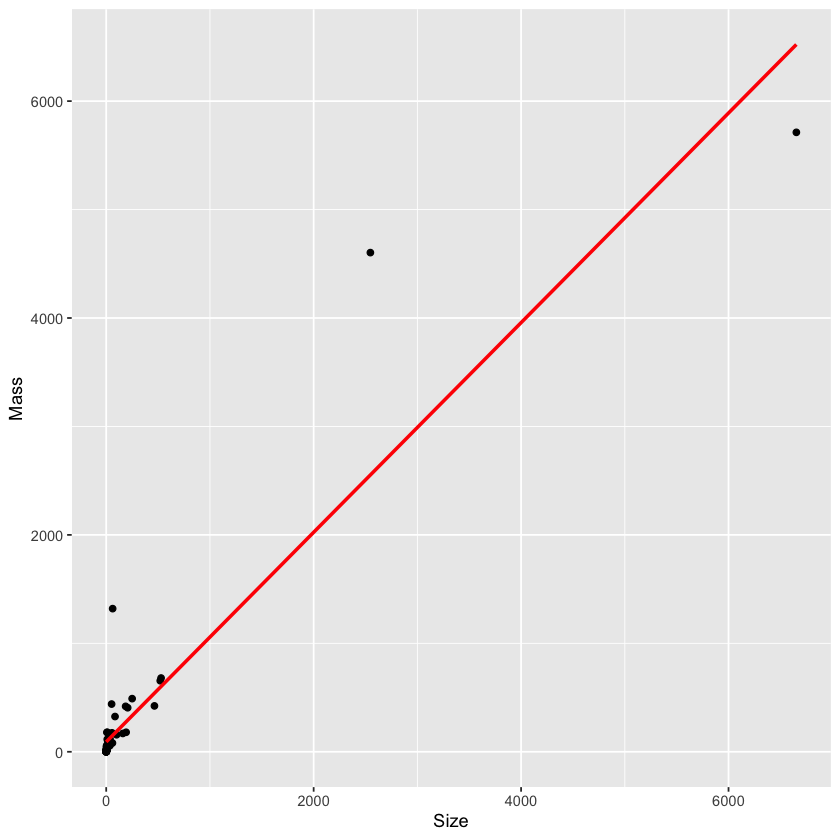

In [56]:
# Plotted original data 
ggplot(sizeMass, aes(x = Size, y = Mass)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


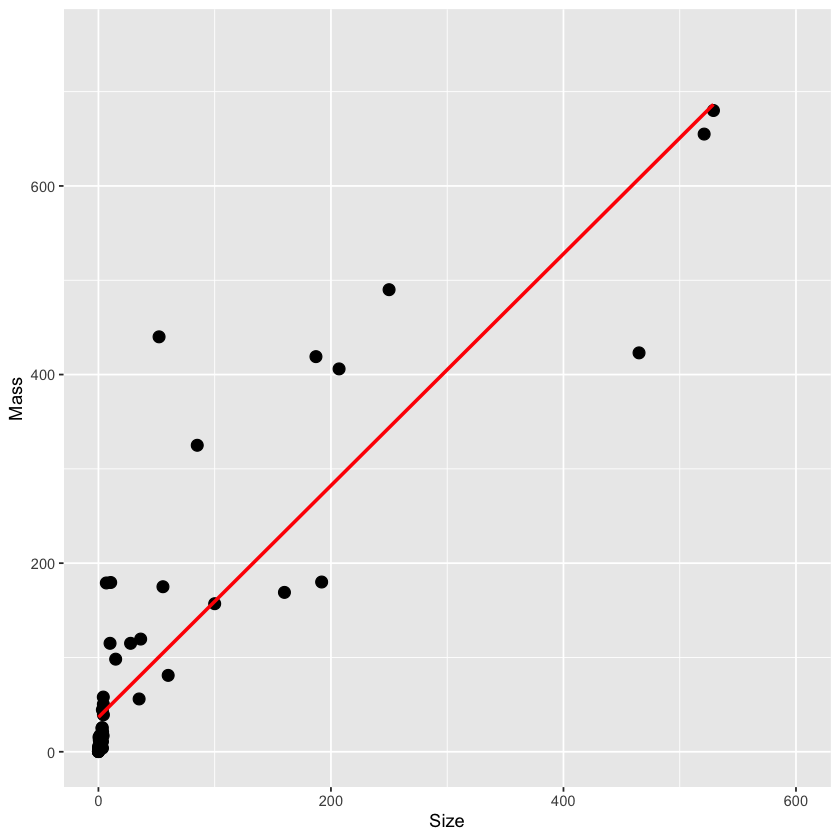

In [78]:
# Changing the scale of the values to get rid of 3 outliers
ggplot(sizeMass, aes(x = Size, y = Mass)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
    xlim(c(0,600)) + 
    ylim(c(0,750))

`geom_smooth()` using formula = 'y ~ x'


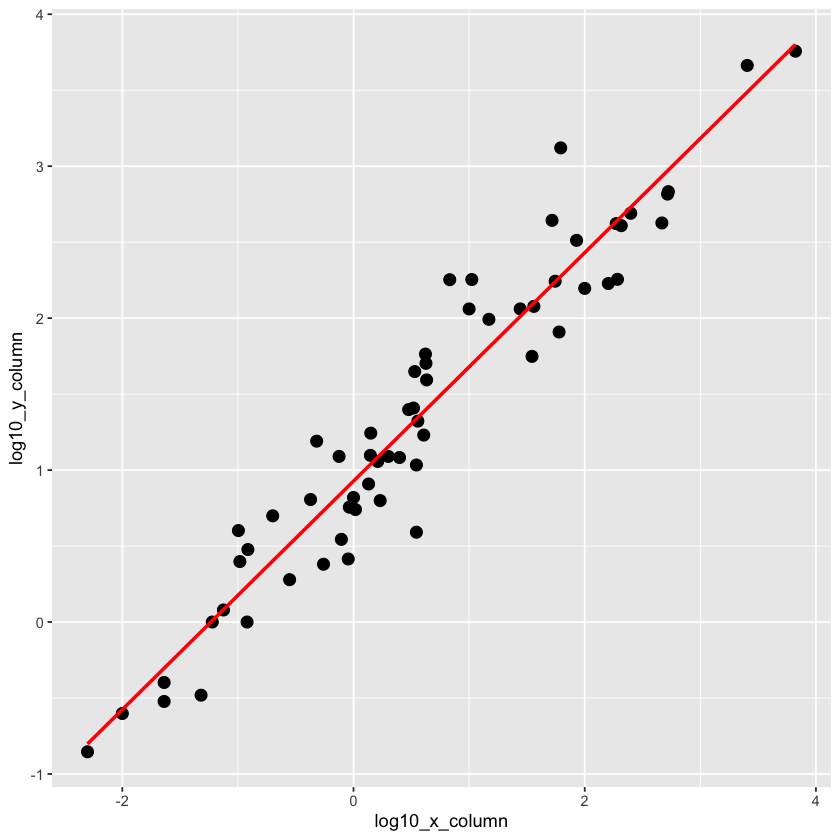

In [85]:
# log transforming the size and mass columns inside the Size Mass dataframe
log10_x_column <- log10(sizeMass$Size)
log10_y_column <- log10(sizeMass$Mass)

# Plotting using log transformed values 
ggplot(sizeMass, aes(x = log10_x_column, y = log10_y_column)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", color = "red", se = FALSE) 

2. Use `scale_x_log10()` and `scale_y_log10()` to set different scales for the x and y aesthetics.

`geom_smooth()` using formula = 'y ~ x'


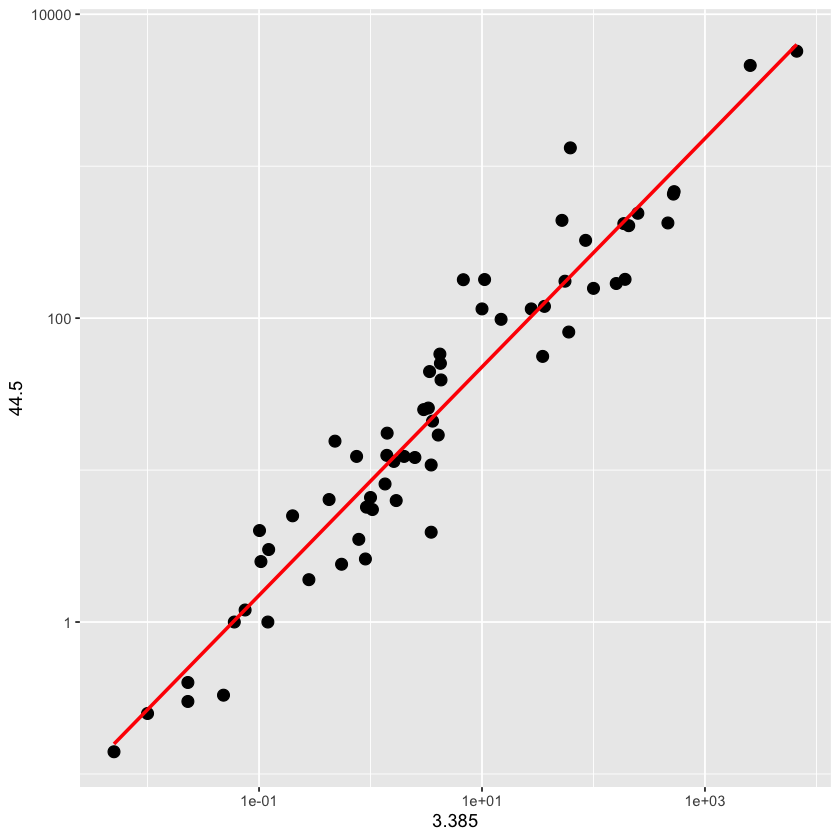

In [103]:
# Use scale_x_10 function to take the log10 of size mass dataframe and plotted
ggplot(sizeMass, aes(Size, Mass)) +
    geom_point(size = 3) + 
    geom_smooth(method = "lm", color = "red", se = FALSE) + 
    scale_x_log10(sizeMass$Size) + 
    scale_y_log10(sizeMass$Mass)